![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- For this project, we have reduced the number of images. There are around 16,500+ images in the dataset provided. You can check “label_details” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in training

In [1]:
# All import statements.
import tensorflow as tf
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from matplotlib import pyplot as plt
from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Reshape, MaxPool2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# run this cell to to mount the google drive if you are using google colab
from google.colab import drive
drive.mount('/content/drive')
project_path = '/content/drive/My Drive/assignments/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wHb4XctuoSj1vS1qb6qO2dNDJCTzG_AnoaDyDWd8M8wol_2hnOMfns
Mounted at /content/drive


In [3]:
#Unzip the data from the gdive
!unzip '/content/drive/My Drive/assignments/Data - German Traffic Sign Recognition.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Data - German Traffic Sign Recognition/Train/28/00028_00005_00001.png  
  inflating: Data - German Traffic Sign Recognition/Train/38/00038_00028_00021.png  
  inflating: Data - German Traffic Sign Recognition/Train/14/00014_00002_00004.png  
  inflating: Data - German Traffic Sign Recognition/Train/38/00038_00038_00013.png  
  inflating: Data - German Traffic Sign Recognition/Train/11/00011_00005_00015.png  
  inflating: Data - German Traffic Sign Recognition/Train/11/00011_00002_00010.png  
  inflating: Data - German Traffic Sign Recognition/Train/12/00012_00014_00020.png  
  inflating: Data - German Traffic Sign Recognition/Train/12/00012_00006_00001.png  
  inflating: Data - German Traffic Sign Recognition/Train/11/00011_00005_00018.png  
  inflating: Data - German Traffic Sign Recognition/Train/38/00038_00064_00002.png  
  inflating: Data - German Traffic Sign Recognition/Train/28/00028_00006_00023.png  
  inflating: D

In [4]:
ls -l

total 12
drwxr-xr-x 4 root root 4096 Sep 10 11:57 'Data - German Traffic Sign Recognition'/
drwx------ 4 root root 4096 Sep 10 11:56  drive/
drwxr-xr-x 1 root root 4096 Aug 27 16:39  sample_data/


We can see there is 1 folder created out of the zip data - "Data - German Traffic Sign Recognition"

Lets explore the folder

In [16]:
ls 'Data - German Traffic Sign Recognition'/

Meta/  Train/


We can see there is a meta folder containing the metadata of the data set.

The actual data is present in the "Train" folder.

In [19]:
ls 'Data - German Traffic Sign Recognition'/Train

0/   11/  14/  17/  2/   22/  25/  28/  30/  33/  36/
1/   12/  15/  18/  20/  23/  26/  29/  31/  34/  37/
10/  13/  16/  19/  21/  24/  27/  3/   32/  35/  38/


The following folders are there in the Train folder: 0, 11, 14, 17, 2, 22, 25, 28, 30, 33, 36, 1, 12, 15, 18, 20, 23, 26, 29, 31, 34, 37, 10, 13, 16, 19, 21, 24, 27, 3, 32, 35, 38.

So we can see there are 33 folders which have images which form the 33 different classes.

In [20]:
# On inspecting the data it was found that the data contained some no byte images which could cause issues in the modelling process
# Clean up such images.
import os
for folder in os.listdir('Data - German Traffic Sign Recognition/Train'):
  for fil in os.listdir('Data - German Traffic Sign Recognition/Train/' + folder):
    if os.path.getsize('Data - German Traffic Sign Recognition/Train/' + folder + '/' + fil) == 0:
      os.remove('Data - German Traffic Sign Recognition/Train/' + folder + '/' + fil)

In [21]:
# Building all the categories into an array
all_categories = ["0", "11", "14", "17", "2", "22", "25", "28", "30", "33", "36", "1", "12", "15", "18", "20", "23", "26", "29", "31", "34", "37","10", "13", "16", "19", "21", "24", "27", "3", "32", "35", "38"]

In [22]:
# Build the image generator
img_generator= ImageDataGenerator(validation_split=.25,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  horizontal_flip=True)

In [23]:
# Define some parameters.
img_size = 64 #Set image size for analsis

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
#Build training generator. 
train_generator = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=64,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='training',
                                                    )

Found 22124 images belonging to 33 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
#Build training generator. 
test_generator = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=64,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='validation',
                                                    )

Found 7364 images belonging to 33 classes.


### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [ ]:
# Building a base model.
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = Sequential()

#normalize data
model.add(BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))


#normalize data
model.add(BatchNormalization())

#Add Conv Layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(BatchNormalization())

#Add Max Pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model.add(Flatten())
model.add(Dense(128, activation='relu'))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer with 33 classes as output
model.add(Dense(33, activation='softmax'))

### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [ ]:
#Specify Loss and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Get model summary (2 Marks)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 64, 64, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

There are total 7,396,973 parameters out of which 7,396,775 are trainable.

The model will ab about 7.4 MB in size

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [ ]:
#Saving the best model using model checkpoint callback
# save in the gdrive for emergency retrieval
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(project_path+'/traffic.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)


In [ ]:
# Store each epoch results in a variable
epochResults = []
class LogValidation(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        epochResults.append({
            "Epoch": epoch, 
            "Training Loss": logs["loss"], 
            "Training Accuracy": logs["accuracy"],  
            "Validation Loss": logs["val_loss"],
            "Validation Accuracy": logs["val_accuracy"]
            })

In [ ]:
# Apply early stopping with patience of 20 epochs without any update
earlyStopping = EarlyStopping(monitor='loss', patience=20)

In [ ]:
# Running the model for 200 epochs
model.fit(train_generator, 
          epochs=200,
          steps_per_epoch= 22124/64,  #Number of training images//batch_size
          validation_data=test_generator,
          validation_steps = 7364//64, #Number of test images//batch_size
          callbacks = [LogValidation(), model_checkpoint, earlyStopping])

Epoch 1/200
346/345 [==============================] - ETA: 0s - loss: 3.9812 - accuracy: 0.1302
Epoch 00001: val_accuracy improved from -inf to 0.08601, saving model to /content/drive/My Drive/assignments/traffic.h5
346/345 [==============================] - 47s 136ms/step - loss: 3.9812 - accuracy: 0.1302 - val_loss: 26.9879 - val_accuracy: 0.0860
Epoch 2/200
346/345 [==============================] - ETA: 0s - loss: 2.8745 - accuracy: 0.2015
Epoch 00002: val_accuracy improved from 0.08601 to 0.21495, saving model to /content/drive/My Drive/assignments/traffic.h5
346/345 [==============================] - 47s 137ms/step - loss: 2.8745 - accuracy: 0.2015 - val_loss: 3.3844 - val_accuracy: 0.2149
Epoch 3/200
346/345 [==============================] - ETA: 0s - loss: 2.6543 - accuracy: 0.2341
Epoch 00003: val_accuracy improved from 0.21495 to 0.25462, saving model to /content/drive/My Drive/assignments/traffic.h5
346/345 [==============================] - 47s 137ms/step - loss: 2.6543 -

### Draw plots (3 Marks)

---


- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

In [ ]:
df = pd.DataFrame(data = epochResults)

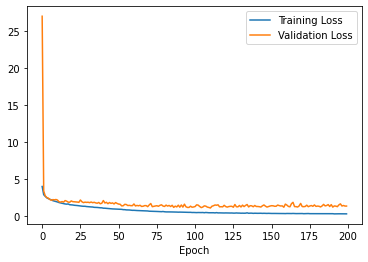

In [ ]:
df.plot(x="Epoch", y=["Training Loss", "Validation Loss"])

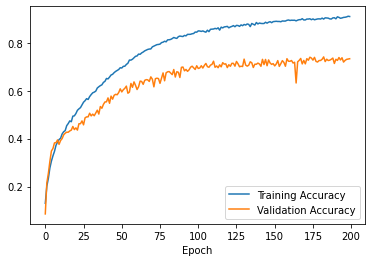

In [ ]:
df.plot(x="Epoch", y=["Training Accuracy", "Validation Accuracy"])

As can be seen from the graph, the model seems to be overfitting model and also the learning rate if the graph fell down considerable to almost flat line after about 100 epochs. 

We can see the same results on both the accuracy and the loss plots.

We can also see that the model seems to be going into diminishing gradient so trying with other options like making a smaller batch size and larger batch size.

### Trying with lower batch size of 32

In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model2 = Sequential()

#normalize data
model2.add(BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))


#normalize data
model2.add(BatchNormalization())

#Add Conv Layer
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model2.add(BatchNormalization())

#Add Max Pool layer
model2.add(MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))

#Add Dropout
model2.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer with 33 classes as output
model2.add(Dense(33, activation='softmax'))

In [ ]:
#Specify Loss and Optimizer
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Build training generator. 
train_generator2 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='training',
                                                    )

Found 22124 images belonging to 33 classes.


In [ ]:
#Build training generator. 
test_generator2 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='validation',
                                                    )

Found 7364 images belonging to 33 classes.


In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(project_path+'/traffic2.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
epochResults2 = []
class LogValidation(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        epochResults2.append({
            "Epoch": epoch, 
            "Training Loss": logs["loss"], 
            "Training Accuracy": logs["accuracy"],  
            "Validation Loss": logs["val_loss"],
            "Validation Accuracy": logs["val_accuracy"]
            })

In [ ]:
earlyStopping = EarlyStopping(monitor='loss', patience=20)

In [ ]:
# Running the model for 200 epochs
model2.fit(train_generator2, 
          epochs=200,
          steps_per_epoch= 22124/32,  #Number of training images//batch_size
          validation_data=test_generator2,
          validation_steps = 7364//32, #Number of test images//batch_size
          callbacks = [LogValidation(), model_checkpoint, earlyStopping])

Epoch 1/200
692/691 [==============================] - ETA: 0s - loss: 3.0221 - accuracy: 0.1630
Epoch 00001: val_accuracy improved from 0.09669 to 0.18084, saving model to /content/drive/My Drive/assignments/traffic2.h5
692/691 [==============================] - 47s 68ms/step - loss: 3.0221 - accuracy: 0.1630 - val_loss: 2.9758 - val_accuracy: 0.1808
Epoch 2/200
692/691 [==============================] - ETA: 0s - loss: 2.8603 - accuracy: 0.1870
Epoch 00002: val_accuracy improved from 0.18084 to 0.21304, saving model to /content/drive/My Drive/assignments/traffic2.h5
692/691 [==============================] - 47s 68ms/step - loss: 2.8603 - accuracy: 0.1870 - val_loss: 2.8000 - val_accuracy: 0.2130
Epoch 3/200
691/691 [============================>.] - ETA: 0s - loss: 2.7604 - accuracy: 0.2080
Epoch 00003: val_accuracy improved from 0.21304 to 0.21902, saving model to /content/drive/My Drive/assignments/traffic2.h5
692/691 [==============================] - 47s 68ms/step - loss: 2.7603

We can observe that the model performs poorer as compared to the previous model with still being a much overfitted model. 
Also because of smaller batch size the model took a lot time per epoch resulting in it being a muxh slower model.

The above model is worse model as compare to the 1st model.

### Trying the same with a larger batch size of 64

In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model3 = Sequential()

#normalize data
model3.add(BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model3.add(Conv2D(32, kernel_size=(3,3), activation='relu'))


#normalize data
model3.add(BatchNormalization())

#Add Conv Layer
model3.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model3.add(BatchNormalization())

#Add Max Pool layer
model3.add(MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))

#Add Dropout
model3.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer with 33 classes as output
model3.add(Dense(33, activation='softmax'))

In [ ]:
#Specify Loss and Optimizer
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Build training generator. 
train_generator3 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=96,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='training',
                                                    )

Found 22124 images belonging to 33 classes.


In [ ]:
#Build training generator. 
test_generator3 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=96,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='validation',
                                                    )

Found 7364 images belonging to 33 classes.


In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(project_path+'/traffic3.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
epochResults3 = []
class LogValidation(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        epochResults3.append({
            "Epoch": epoch, 
            "Training Loss": logs["loss"], 
            "Training Accuracy": logs["accuracy"],  
            "Validation Loss": logs["val_loss"],
            "Validation Accuracy": logs["val_accuracy"]
            })

In [ ]:
earlyStopping = EarlyStopping(monitor='loss', patience=20)

In [ ]:
# Running the model for 200 epochs
model4.fit(train_generator4, 
          epochs=200,
          steps_per_epoch= 22124/64,  #Number of training images//batch_size
          validation_data=test_generator4,
          validation_steps = 7364//64, #Number of test images//batch_size
          callbacks = [LogValidation(), model_checkpoint, earlyStopping])

Epoch 1/200
230/230 [============================>.] - ETA: 0s - loss: 4.8163 - accuracy: 0.0899
Epoch 00001: val_accuracy improved from -inf to 0.09663, saving model to /content/drive/My Drive/assignments/traffic3.h5
231/230 [==============================] - 16s 69ms/step - loss: 4.8094 - accuracy: 0.0901 - val_loss: 28.4913 - val_accuracy: 0.0966
Epoch 2/200
231/230 [==============================] - ETA: 0s - loss: 3.3730 - accuracy: 0.1050
Epoch 00002: val_accuracy improved from 0.09663 to 0.10362, saving model to /content/drive/My Drive/assignments/traffic3.h5
231/230 [==============================] - 16s 70ms/step - loss: 3.3730 - accuracy: 0.1050 - val_loss: 4.4644 - val_accuracy: 0.1036
Epoch 3/200
231/230 [==============================] - ETA: 0s - loss: 3.2124 - accuracy: 0.1135
Epoch 00003: val_accuracy improved from 0.10362 to 0.12541, saving model to /content/drive/My Drive/assignments/traffic3.h5
231/230 [==============================] - 16s 71ms/step - loss: 3.2124 -

We can conclude that the model does not perform too well and hence we go back to original model 1st model to train it further and see it can attain better accuracies.

### Train the original model (model 1 with batch size of 64) for 200 more epochs

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(project_path+'/traffic.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
class LogValidation(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        epochResults.append({
            "Epoch": epoch, 
            "Training Loss": logs["loss"], 
            "Training Accuracy": logs["accuracy"],  
            "Validation Loss": logs["val_loss"],
            "Validation Accuracy": logs["val_accuracy"]
            })

In [ ]:
model.load_weights(project_path+'/traffic.h5')

In [ ]:
# Running the model for 200 epochs
model.fit(train_generator, 
          epochs=200,
          steps_per_epoch= 22124/64,  #Number of training images//batch_size
          validation_data=test_generator,
          validation_steps = 7364//64, #Number of test images//batch_size
          callbacks = [LogValidation(), model_checkpoint, earlyStopping])

Epoch 1/200
346/345 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.9008
Epoch 00001: val_accuracy improved from -inf to 0.71562, saving model to /content/drive/My Drive/assignments/traffic.h5
346/345 [==============================] - 46s 133ms/step - loss: 0.2997 - accuracy: 0.9008 - val_loss: 1.5384 - val_accuracy: 0.7156
Epoch 2/200
346/345 [==============================] - ETA: 0s - loss: 0.2917 - accuracy: 0.9039
Epoch 00002: val_accuracy improved from 0.71562 to 0.74348, saving model to /content/drive/My Drive/assignments/traffic.h5
346/345 [==============================] - 46s 134ms/step - loss: 0.2917 - accuracy: 0.9039 - val_loss: 1.2497 - val_accuracy: 0.7435
Epoch 3/200
346/345 [==============================] - ETA: 0s - loss: 0.3059 - accuracy: 0.8998
Epoch 00003: val_accuracy did not improve from 0.74348
346/345 [==============================] - 46s 133ms/step - loss: 0.3059 - accuracy: 0.8998 - val_loss: 1.4420 - val_accuracy: 0.7340
Epoch 4/2

We can see that the model did improve in accuracy from 74.5 to 76.8% but still its a very overfitting model with differce in training and validation accuracy of close to 15%.

We can keep the above model but try with alternate approach of Transfer Learning

### Creating a Transfer learning model with base model of EfficientNetB4

In [ ]:
#Build training generator. 
train_generator4 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=64,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='training',
                                                    )

Found 22124 images belonging to 33 classes.


In [ ]:
#Build training generator. 
test_generator4 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=64,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='validation',
                                                    )

Found 7364 images belonging to 33 classes.


In [ ]:
def normalize_data(img):
    
    #Normalize for ResNet50
    return tf.keras.applications.efficientnet.EfficientNetB4.preprocess_input(img)

In [ ]:
tf.keras.backend.clear_session()
model4 = tf.keras.applications.efficientnet.EfficientNetB4(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(img_size,img_size,3),
                                       weights='imagenet')

71688192/71686520 [==============================] - 1s 0us/step


In [ ]:
len(model4.layers)

474

In [ ]:
#Set pre-trained model layers to not trainable
for layer in model4.layers:
    layer.trainable = False

In [ ]:
#Check if layers frozen
model4.summary()

Model: "efficientnetb4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 64, 64, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 64, 64, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 65, 65, 3)    0           normalization[0][0]              
_____________________________________________________________________________________

We can observe that none of the layers are trainable and the model is run from the weights provided by original model.

In [ ]:
#get Output layer of Pre0trained model
x = model4.output

#Global average pool to reduce number of features and Flatten the output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
#Add output layer
prediction = tf.keras.layers.Dense(33,activation='softmax')(x)

In [ ]:
prediction

<tf.Tensor 'dense/Softmax:0' shape=(None, 33) dtype=float32>

In [ ]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model4.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [ ]:
#Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#How does our overall model looks
final_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 64, 64, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 64, 64, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 65, 65, 3)    0           normalization[0][0]              
_______________________________________________________________________________________

Please observer the trainable params comes from the last output layer.

In [ ]:
earlyStopping = EarlyStopping(monitor='loss', patience=20)

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(project_path+'/traffic4.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
epochResults4 = []
class LogValidation(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        epochResults4.append({
            "Epoch": epoch, 
            "Training Loss": logs["loss"], 
            "Training Accuracy": logs["accuracy"],  
            "Validation Loss": logs["val_loss"],
            "Validation Accuracy": logs["val_accuracy"]
            })

In [ ]:
final_model.fit(train_generator4, 
          epochs=200,
          steps_per_epoch= 22124/64,  #Number of training images//batch_size
          validation_data=test_generator4,
          validation_steps = 7364//64, #Number of test images//batch_size
          callbacks = [LogValidation(), model_checkpoint, earlyStopping])

Epoch 1/200
346/345 [==============================] - ETA: 0s - loss: 1.7849 - accuracy: 0.4849
Epoch 00001: val_accuracy improved from -inf to 0.52853, saving model to /content/drive/My Drive/assignments/traffic4.h5
346/345 [==============================] - 49s 141ms/step - loss: 1.7849 - accuracy: 0.4849 - val_loss: 1.5061 - val_accuracy: 0.5285
Epoch 2/200
346/345 [==============================] - ETA: 0s - loss: 1.2706 - accuracy: 0.6079
Epoch 00002: val_accuracy improved from 0.52853 to 0.57595, saving model to /content/drive/My Drive/assignments/traffic4.h5
346/345 [==============================] - 46s 134ms/step - loss: 1.2706 - accuracy: 0.6079 - val_loss: 1.3533 - val_accuracy: 0.5760
Epoch 3/200
346/345 [==============================] - ETA: 0s - loss: 1.1243 - accuracy: 0.6442
Epoch 00003: val_accuracy improved from 0.57595 to 0.58573, saving model to /content/drive/My Drive/assignments/traffic4.h5
346/345 [==============================] - 46s 132ms/step - loss: 1.1243

We can see that the model starts learning very fast but stops learning soon and the accuracy comes to almost flat rate after just about 20 epochs

One possible reason that the model stops learning could be because there are too less layers which are learning. 

Lets try to unfreeze a few layers for testing.

### Create a model by unfreezing last 5% about 25 layers of EfficientNetB4 model

We can see that there are a lot of parameters to learn now since majority of these trainable params comes from the last 5% layers.

In [ ]:
#Build training generator. 
train_generator6 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=64,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='training',
                                                    )

Found 22124 images belonging to 33 classes.


In [ ]:
#Build training generator. 
test_generator6 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=64,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='validation',
                                                    )

Found 7364 images belonging to 33 classes.


In [ ]:
def normalize_data(img):
    
    #Normalize for ResNet50
    return tf.keras.applications.efficientnet.EfficientNetB4.preprocess_input(img)

In [ ]:
tf.keras.backend.clear_session()
model6 = tf.keras.applications.efficientnet.EfficientNetB4(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(img_size,img_size,3),
                                       weights='imagenet')

In [ ]:
len(model6.layers)

474

In [ ]:
#Unfreezing all layers after layer# 158
for layer in model6.layers[158:]:
    layer.trainable = True 

In [ ]:
#get Output layer of Pretrained model
x = model6.output

In [ ]:
#Global average pool to reduce number of features and Flatten the output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
#Add output layer
prediction = tf.keras.layers.Dense(33,activation='softmax')(x)

In [ ]:
prediction

<tf.Tensor 'dense/Softmax:0' shape=(None, 33) dtype=float32>

In [ ]:
#Using Keras Model class
final_model2 = tf.keras.models.Model(inputs=model6.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [ ]:
#Compile the model
final_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#How does our overall model looks
final_model2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 64, 64, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 64, 64, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 65, 65, 3)    0           normalization[0][0]              
_______________________________________________________________________________________

In [ ]:
earlyStopping = EarlyStopping(monitor='loss', patience=20)

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(project_path+'/traffic6.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
epochResults6 = []
class LogValidation(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        epochResults6.append({
            "Epoch": epoch, 
            "Training Loss": logs["loss"], 
            "Training Accuracy": logs["accuracy"],  
            "Validation Loss": logs["val_loss"],
            "Validation Accuracy": logs["val_accuracy"]
            })

In [ ]:
final_model2.fit(train_generator6, 
          epochs=200,
          steps_per_epoch= 22124/64,  #Number of training images//batch_size
          validation_data=test_generator6,
          validation_steps = 7364//64, #Number of test images//batch_size
          callbacks = [LogValidation(), model_checkpoint, earlyStopping])

Epoch 1/200
346/345 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.8510
Epoch 00001: val_accuracy improved from -inf to 0.90679, saving model to /content/drive/My Drive/assignments/traffic6.h5
346/345 [==============================] - 67s 195ms/step - loss: 0.4850 - accuracy: 0.8510 - val_loss: 0.3445 - val_accuracy: 0.9068
Epoch 2/200
346/345 [==============================] - ETA: 0s - loss: 0.1103 - accuracy: 0.9649
Epoch 00002: val_accuracy improved from 0.90679 to 0.92500, saving model to /content/drive/My Drive/assignments/traffic6.h5
346/345 [==============================] - 64s 185ms/step - loss: 0.1103 - accuracy: 0.9649 - val_loss: 0.2905 - val_accuracy: 0.9250
Epoch 3/200
346/345 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 0.9786
Epoch 00003: val_accuracy improved from 0.92500 to 0.94321, saving model to /content/drive/My Drive/assignments/traffic6.h5
346/345 [==============================] - 65s 187ms/step - loss: 0.0730

We can observe that the model performed excellently as compared to the other models and also when compared to the frozen model. We achieved the results as:

----Loss: .2057
----Accuracy: 96.75

Lets use this as the final model 

Plotting the results

In [ ]:
df = pd.DataFrame(data = epochResults6)

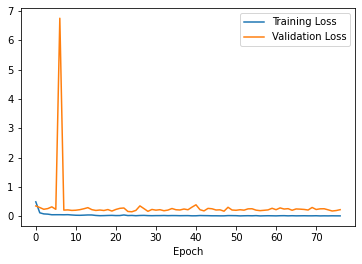

In [ ]:
df.plot(x="Epoch", y=["Training Loss", "Validation Loss"])

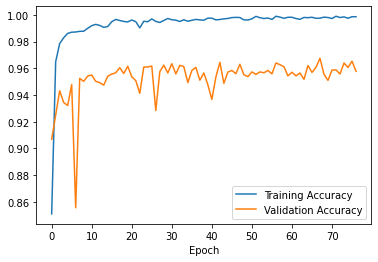

In [ ]:
df.plot(x="Epoch", y=["Training Accuracy", "Validation Accuracy"])

We see that the model performed quite well but made an early stopping. Trying the same model but with no early stopping

### Best model with 200 epoch no early stopping

In [24]:
#Build training generator. 
train_generator7 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=64,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='training',
                                                    )

Found 22124 images belonging to 33 classes.


In [25]:
#Build training generator. 
test_generator7 = img_generator.flow_from_directory(directory='Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=64,
                                                    classes=all_categories,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='validation',
                                                    )

Found 7364 images belonging to 33 classes.


In [26]:
tf.keras.backend.clear_session()
model7 = tf.keras.applications.efficientnet.EfficientNetB4(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(img_size,img_size,3),
                                       weights='imagenet')

71688192/71686520 [==============================] - 4s 0us/step


In [27]:
#Unfreezing all layers after layer# 158
for layer in model7.layers[158:]:
    layer.trainable = True 

In [28]:
#get Output layer of Pretrained model
x = model7.output

#Global average pool to reduce number of features and Flatten the output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [29]:
#Add output layer
prediction = tf.keras.layers.Dense(33,activation='softmax')(x)

In [30]:
#Using Keras Model class
final_model3 = tf.keras.models.Model(inputs=model7.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [31]:
#Compile the model
final_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(project_path+'/traffic7.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [33]:
epochResults7 = []
class LogValidation(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        epochResults7.append({
            "Epoch": epoch, 
            "Training Loss": logs["loss"], 
            "Training Accuracy": logs["accuracy"],  
            "Validation Loss": logs["val_loss"],
            "Validation Accuracy": logs["val_accuracy"]
            })

In [35]:
# Let the model train for 200 epochs with no early stopping
final_model3.fit(train_generator7, 
          epochs=200,
          steps_per_epoch= 22124/64,  #Number of training images//batch_size
          validation_data=test_generator7,
          validation_steps = 7364//64, #Number of test images//batch_size
          callbacks = [LogValidation(), model_checkpoint])

Epoch 1/200
346/345 [==============================] - ETA: 0s - loss: 0.5037 - accuracy: 0.8433
Epoch 00001: val_accuracy improved from -inf to 0.90829, saving model to /content/drive/My Drive/assignments/traffic7.h5
346/345 [==============================] - 128s 370ms/step - loss: 0.5037 - accuracy: 0.8433 - val_loss: 0.3389 - val_accuracy: 0.9083
Epoch 2/200
346/345 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9669
Epoch 00002: val_accuracy improved from 0.90829 to 0.93315, saving model to /content/drive/My Drive/assignments/traffic7.h5
346/345 [==============================] - 121s 351ms/step - loss: 0.1003 - accuracy: 0.9669 - val_loss: 0.2396 - val_accuracy: 0.9332
Epoch 3/200
346/345 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9788
Epoch 00003: val_accuracy did not improve from 0.93315
346/345 [==============================] - 116s 335ms/step - loss: 0.0698 - accuracy: 0.9788 - val_loss: 0.2377 - val_accuracy: 0.9317
Epoc

KeyboardInterrupt: ignored

Interupted the model as the accuracy was not improving after a long run and the model taking a lot of time.

In [37]:
df = pd.DataFrame(data = epochResults7)

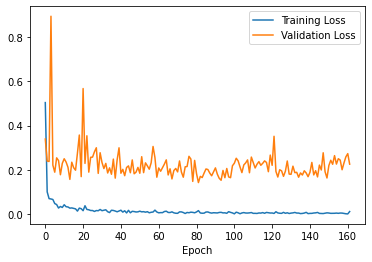

In [38]:
df.plot(x="Epoch", y=["Training Loss", "Validation Loss"])

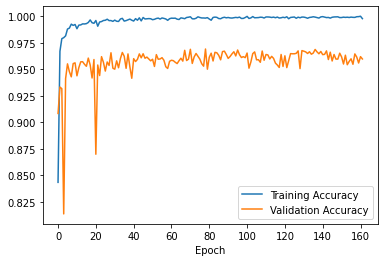

In [39]:
df.plot(x="Epoch", y=["Training Accuracy", "Validation Accuracy"])

As can been seen the model has quicky gone up to 90% + accuracy level in tests. The validation accuracy of the model is 96.9% and validation loss is 0.1477.

### Conclusion

We can see that the Transfer learning model with base model of EfficientNetB4 performs extremely well with the accuracy of close to 97%

We can also see from the graph that the model reach a very good accuracy in first few epochs and reachs to highest accuracy by about 75 epochs. We can use this as the final model